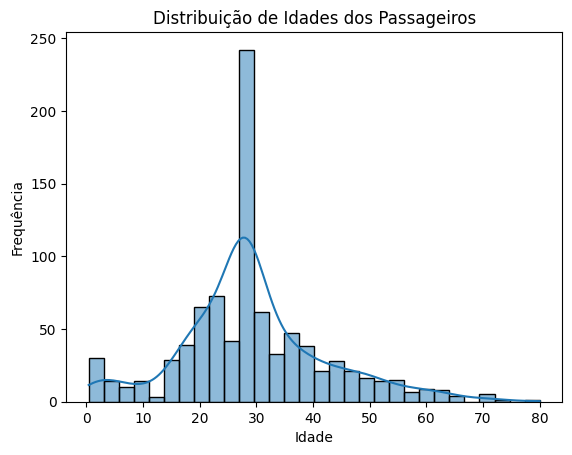


✅ Informações dos Passageiros (Nome, Idade, Sexo, Classe e Sobrevivente):

  Cabin            Ticket                                               Name  \
0   NaN         A/5 21171                            Braund, Mr. Owen Harris   
1   C85          PC 17599  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2   NaN  STON/O2. 3101282                             Heikkinen, Miss. Laina   
3  C123            113803       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4   NaN            373450                           Allen, Mr. William Henry   
5   NaN            330877                                   Moran, Mr. James   
6   E46             17463                            McCarthy, Mr. Timothy J   
7   NaN            349909                     Palsson, Master. Gosta Leonard   
8   NaN            347742  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9   NaN            237736                Nasser, Mrs. Nicholas (Adele Achem)   

   PassengerId Survived  Pclass        Sex 

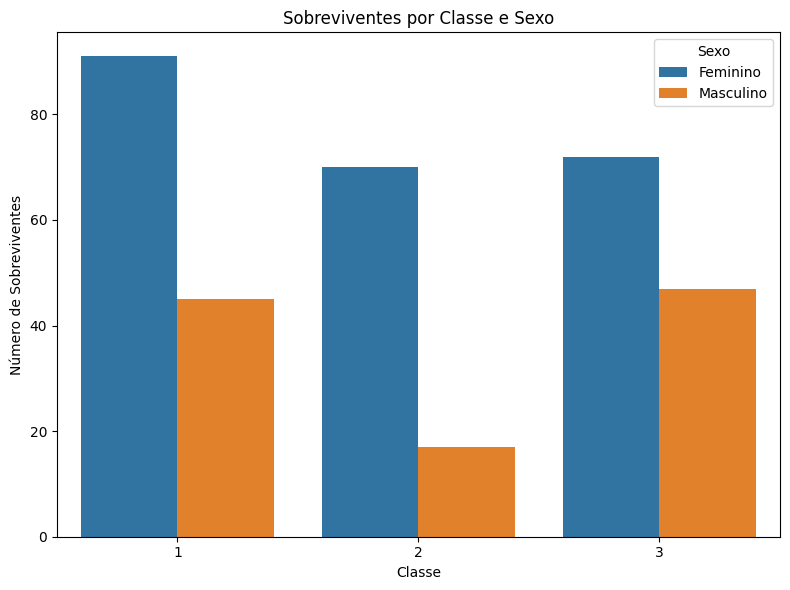


🎯 Quantidade de passageiros que sobreviveram (1) e morreram (0):
Survived
0    549
1    342
Name: count, dtype: int64

📊 Proporção média de sobreviventes: 38.38%

📈 Média de idade por status de sobrevivência:
0 = Não Sobreviveu, 1 = Sobreviveu
Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


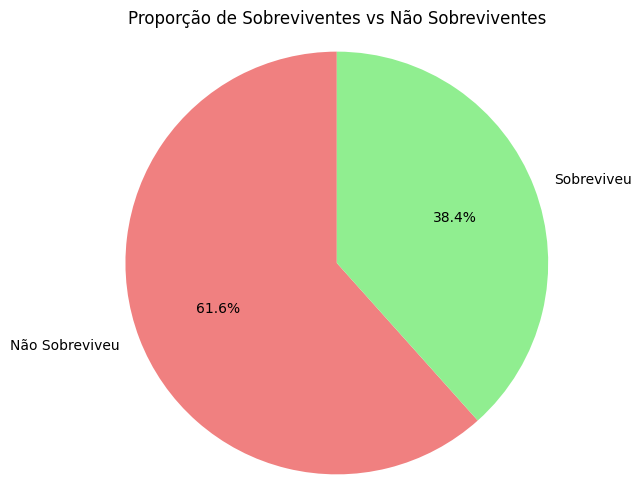

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega o dataset limpo
df = pd.read_csv(r"E:\Projeto-Titanic\titanic_pipeline\data\processed\titanic_clean.csv")
# 1. Histograma da idade
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribuição de Idades dos Passageiros")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# 2. DataFrame com Nome, Idade, Sexo, Classe e Sobrevivente
info_pessoas = df[['Cabin', 'Ticket', 'Name','PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Traduz coluna "Survived" para Sim/Não (opcional)
info_pessoas["Survived"] = info_pessoas["Survived"].map({0: "Não", 1: "Sim"})

print("\n✅ Informações dos Passageiros (Nome, Idade, Sexo, Classe e Sobrevivente):\n")
print(info_pessoas.head(10))

# 3. Sobreviventes por Classe e Sexo (apenas sobreviventes)
sobreviventes = info_pessoas[info_pessoas["Survived"] == "Sim"].groupby(["Pclass", "Sex"]).size().reset_index(name="Total")

print("\n✅ Total de Sobreviventes por Classe e Sexo:\n")
print(sobreviventes)

# 4. Gráfico de sobreviventes por classe e sexo
plt.figure(figsize=(8, 6))
sns.barplot(data=sobreviventes, x="Pclass", y="Total", hue="Sex")
plt.title("Sobreviventes por Classe e Sexo")
plt.xlabel("Classe")
plt.ylabel("Número de Sobreviventes")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()
# ✅ 5. Quantidade total de sobreviventes e não sobreviventes (0 = morreu, 1 = sobreviveu)
contagem_sobreviventes = df["Survived"].value_counts()
print("\n🎯 Quantidade de passageiros que sobreviveram (1) e morreram (0):")
print(contagem_sobreviventes)

# ✅ 6. Proporção média de sobrevivência
media_sobrevivencia = df["Survived"].mean()
print(f"\n📊 Proporção média de sobreviventes: {media_sobrevivencia:.2%}")

# ✅ 7. Média de idade entre quem sobreviveu e quem não sobreviveu
media_idade_por_status = df.groupby("Survived")["Age"].mean()
print("\n📈 Média de idade por status de sobrevivência:")
print("0 = Não Sobreviveu, 1 = Sobreviveu")
print(media_idade_por_status)
# ✅ Gráfico de pizza da proporção de sobreviventes
labels = ["Não Sobreviveu", "Sobreviveu"]
cores = ["lightcoral", "lightgreen"]

plt.figure(figsize=(6, 6))
plt.pie(contagem_sobreviventes, labels=labels, autopct="%1.1f%%", startangle=90, colors=cores)
plt.title("Proporção de Sobreviventes vs Não Sobreviventes")
plt.axis("equal")  # Deixa o gráfico redondo
plt.show()

